In [39]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import patches
import matplotlib.transforms as transforms

In [232]:
A=np.array([1,1,1])
B=np.array([2,1,2])

np.linalg.norm(A - B)

1.4142135623730951

In [175]:
import sympy

In [182]:
sympy.cos(sympy.pi)

-1

In [238]:
x, y, theta = sympy.symbols('x, y, theta')
v, w, gamma = sympy.symbols('v, w, gamma')
dt = sympy.symbols('t')

gx = sympy.Matrix([ 
                    [ x - v/w * sympy.sin(theta) + v/w * sympy.sin(theta + w * dt) ],
                    [ y + v/w * sympy.cos(theta) - v/w * sympy.cos(theta + w * dt) ],
                    [ theta + w * dt ]
                ])

state = sympy.Matrix([x, y, theta])
control = sympy.Matrix([v, w])

G_X = gx.jacobian(state)
G_U = gx.jacobian(control)

In [239]:
gx

Matrix([
[-v*sin(theta)/w + v*sin(t*w + theta)/w + x],
[ v*cos(theta)/w - v*cos(t*w + theta)/w + y],
[                               t*w + theta]])

In [236]:
G_U

Matrix([
[-sin(theta)/w + sin(t*w + theta)/w, t*v*cos(t*w + theta)/w + v*sin(theta)/w**2 - v*sin(t*w + theta)/w**2],
[ cos(theta)/w - cos(t*w + theta)/w, t*v*sin(t*w + theta)/w - v*cos(theta)/w**2 + v*cos(t*w + theta)/w**2],
[                                 0,                                                                    t]])

In [229]:
subs = {
    'x': 0,
    'y': 0,
    theta: 0,
    v: 1,
    'w': 1,
    'gamma': 0.1,
    'dt': 0.1
}

In [230]:
gx.evalf(subs=subs)

Matrix([
[-v*sin(theta)/w + v*sin(t*w + theta)/w + x],
[                              1.0 - cos(t)],
[                                     1.1*t]])

In [214]:
x, y, theta = sympy.symbols('x, y, theta')
v, w, gamma = sympy.symbols('v, w, gamma')
dt = sympy.symbols('t')

H = sympy.Matrix([ 
                    [ x - v/w * sympy.sin(theta) + v/w * sympy.sin(theta + w * dt) ],
                    [ y + v/w * sympy.cos(theta) - v/w * sympy.cos(theta + w * dt) ],
                    [ theta + w * dt + gamma * dt]
                 ])

state = sympy.Matrix([x, y, theta])
state

control = sympy.Matrix([v, w])

jacob = H.jacobian(control)


jacob
jacob.evalf(subs={'x': 1, 'v': 2})
# J = H.jacobian(state)

# J

Matrix([
[-sin(theta)/w + sin(t*w + theta)/w, 2.0*t*cos(t*w + theta)/w + 2.0*sin(theta)/w**2 - 2.0*sin(t*w + theta)/w**2],
[ cos(theta)/w - cos(t*w + theta)/w, 2.0*t*sin(t*w + theta)/w - 2.0*cos(theta)/w**2 + 2.0*cos(t*w + theta)/w**2],
[                                 0,                                                                          t]])

In [202]:
x[2]

TypeError: 'Symbol' object is not subscriptable

In [181]:
x, x_vel, y = sympy.symbols('x, x_vel y')

H = sympy.Matrix([sympy.sqrt(x**2 + y**2)])

state = sympy.Matrix([x, x_vel, y])
J = H.jacobian(state)

J

Matrix([[x/sqrt(x**2 + y**2), 0, y/sqrt(x**2 + y**2)]])

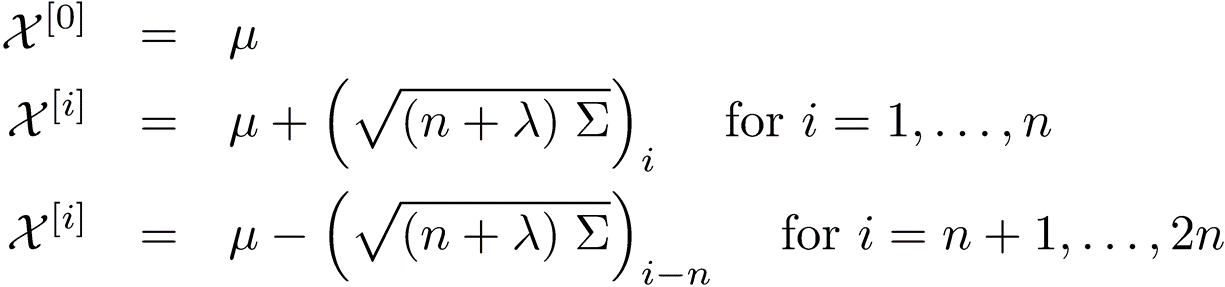

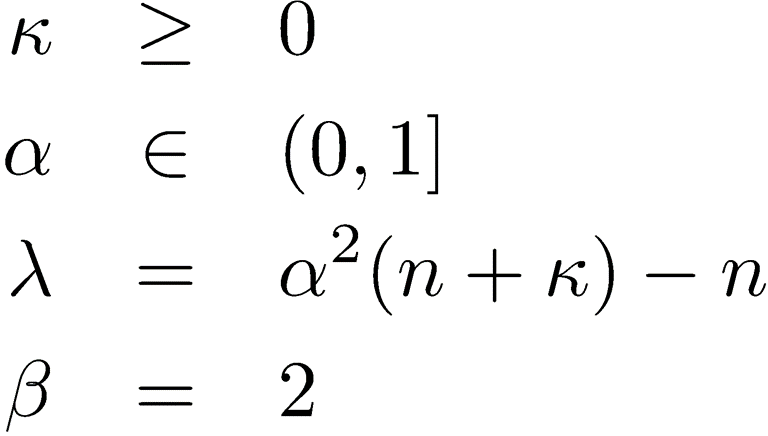

In [2]:
# sample distribution for testing

g = lambda x, y: np.array( [x + 1, y + 1] )

g(1,2)
#g.cov



array([2, 3])

In [4]:
m = np.zeros(2)
C = np.eye(2)
multivariate_normal(mean=m, cov=C).pdf([0,0])

0.15915494309189535

-------------------

In [3]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [5]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

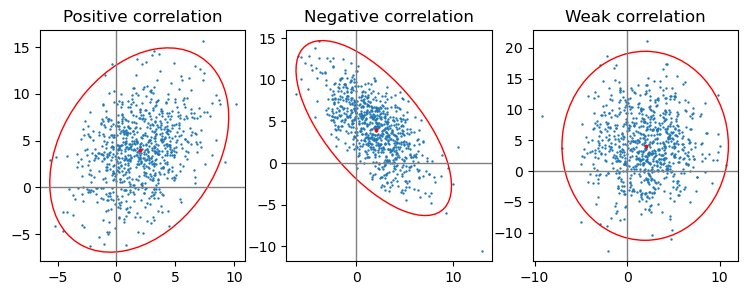

In [7]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

----------------------

In [28]:
def confidence_ellipse(m, C, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
#     if x.size != y.size:
#         raise ValueError("x and y must be the same size")

    #cov = np.cov(x, y)
    
    pearson = C[0, 1]/np.sqrt(C[0, 0] * C[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor='red', **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(C[0, 0]) * n_std
    mean_x = m[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(C[1, 1]) * n_std
    mean_y = m[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ellipse #ax.add_patch(ellipse)

[]

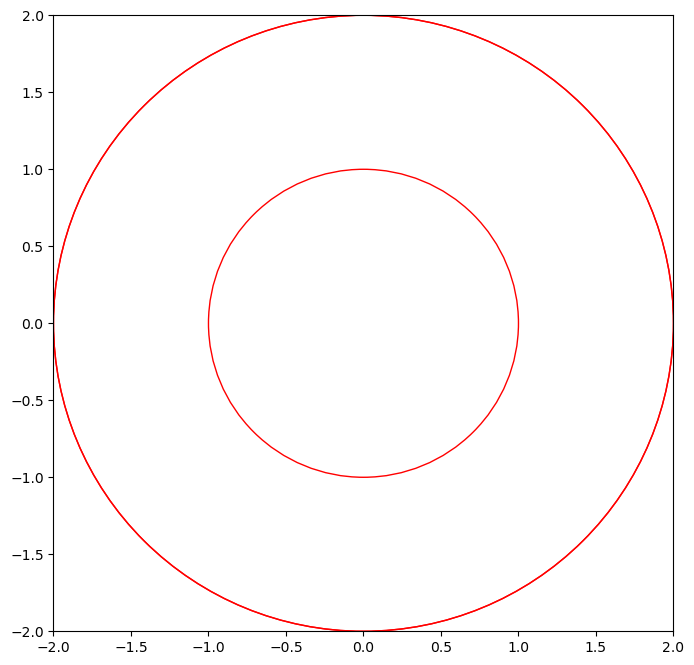

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))
#confidence_ellipse(m, C, axs[0], n_std=3.0, edgecolor='red')

lambda_, v = np.linalg.eig(C)
lambda_ = np.sqrt(lambda_)

for j in range(1,3):
    elli = Ellipse(xy=(m[0], m[1]),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    elli.set_facecolor('none')
    elli.set_edgecolor('red')
    axs.add_artist(elli)


#elli = Ellipse([1,1], width=1, height=1, angle=0)
axs.set_xlim([-2,2])
axs.set_ylim([-2,2])
axs.add_patch(elli)
plt.plot()

In [70]:
a = 50
fr'test \alpha{a}'

'test \\alpha50'

In [77]:
plt.rc('text', usetex=True)
fr'Mean resistance, \textsigma\ '

'Mean resistance, \\textsigma\\ '

In [72]:
fr'\textkappa =  {kappa}\n$\alpha = $ {alpha}'

'\\textkappa =  3\\n$\\alpha = $ 0.25'

In [118]:
d = {'a': [1,2,3], 'b': [4,5,6]}

for x in d.items():
    print(x)

('a', [1, 2, 3])
('b', [4, 5, 6])


In [123]:
np.linspace(-1,1,5)

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [125]:
sig_points = calc_sigma_points(mu, sigma, kappa, alpha, beta)
sig_points

array([[ 0.        ,  0.        ],
       [ 1.67705098,  0.        ],
       [ 0.        ,  1.67705098],
       [-1.67705098,  0.        ],
       [ 0.        , -1.67705098]])

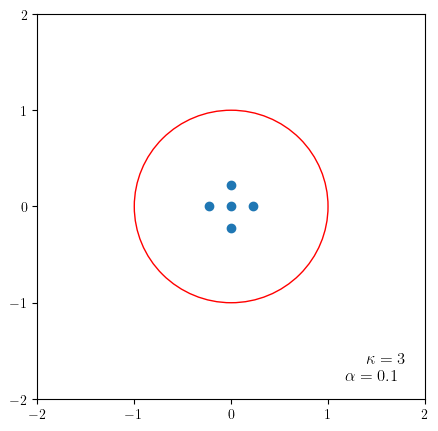

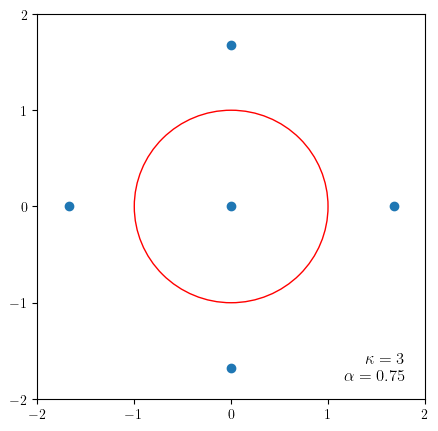

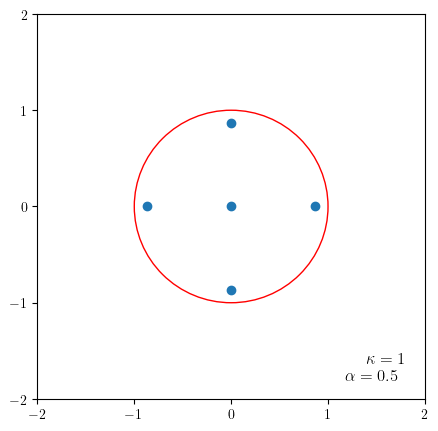

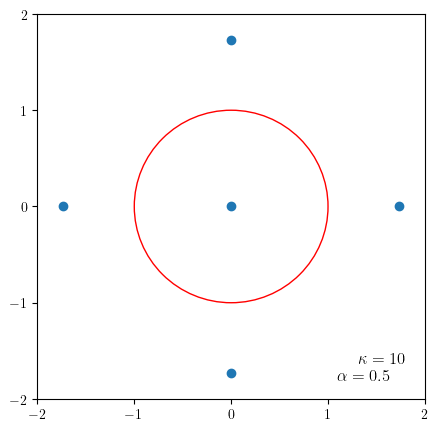

In [131]:
from scipy.linalg import cholesky

def demo_con_style(ax, connectionstyle):
    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

#     ax.plot([x1, x2], [y1, y2], ".")
#     ax.annotate("",
#                 xy=(x1, y1), xycoords='data',
#                 xytext=(x2, y2), textcoords='data',
#                 arrowprops=dict(arrowstyle="->", color="0.5",
#                                 shrinkA=5, shrinkB=5,
#                                 patchA=None, patchB=None,
#                                 connectionstyle=connectionstyle,
#                                 ),
#                 )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="right", va="bottom")

def calc_sigma_points(mu, sigma, kappa, alpha, beta):
    n = mu.shape[0]
    lmbd = alpha**2 * ( n + kappa ) - n
    
    # 1: calculate sigma points: define chi_{t-1}
    sigma_point_shift = cholesky((n + lmbd) * sigma)  #np.sqrt( (self.n + self.lmbd) * sigma )
    chi = np.zeros([n*2 + 1, 2])
    chi[0] = mu
    for i in range(1, n + 1):
        #                                            Take the column vector
        chi[i] = np.subtract(mu, -sigma_point_shift[:, i - 1]) #np.sqrt( (self.n + self.lmbd) * sigma )[:, i - 1]
    for i in range(n + 1, 2*n + 1):
        #                                            Take the column vector
        chi[i] = np.subtract(mu, sigma_point_shift[:, i - n - 1]) #np.sqrt( (self.n + self.lmbd) * sigma )[:, i - self.n - 1]
    return chi

mu = np.zeros(2)
sigma = np.eye(2)

kappa = 3
alpha = 0.25
beta = 2

params = {
    'kappa': [3, 3, 1, 10],
    'alpha': [0.1, 0.75, 0.5, 0.5],
    'beta': [2, 2, 2 ,2]    
}

for i in range(4):
    
    fig, ax = plt.subplots(figsize=(5,5))
    
    kappa = params['kappa'][i]
    alpha = params['alpha'][i]
    beta = params['beta'][i]

    sig_points = calc_sigma_points(mu, sigma, kappa, alpha, beta)

    # fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

    




    ax.scatter(sig_points[:,0], sig_points[:,1])


    ax.add_patch(confidence_ellipse(mu, sigma, ax, n_std=1.0, facecolor='None'))
    
    if sig_points[3][0] < 1:
        ax.set_xticks(np.linspace(-2,2,5))
        ax.set_yticks(np.linspace(-2,2,5))
    else:
        ax.set_xticks([x for x in np.arange(-1, 1.25, 0.25)])
        ax.set_yticks([x for x in np.arange(-1, 1.25, 0.25)])


    # custom_legend = patches.Rectangle((0.5, -1.), 0.5, 0.5, edgecolor='black',
    # facecolor='None', linewidth=1.5)
    # ax.add_patch(custom_legend)
    # rx, ry = custom_legend.get_xy()
    # cx = rx + custom_legend.get_width()/2.0
    # cy = ry + custom_legend.get_height()/2.0

    # demo_con_style(ax, fr'\kappa={kappa},\alpha={alpha}')

    ax.text(.95, .05, fr'$\kappa ={kappa}$\newline  $\alpha ={alpha}$', fontsize = 12,
            transform=ax.transAxes, ha="right", va="bottom")
    # ax.annotate( (fr'$\kappa = $ {kappa}\n$\alpha = $ {alpha}', (cx, cy), color='black', fontsize=8, ha='center', va='center')
    #weight=None
    
    fig.savefig(f'media/conf_ellipse_kappa_{kappa}_alpha_{alpha}.png')

# for i in range(axes.shape[0]):
#     for j in range(axes.shape[1]):
        
#         sig_points = calc_sigma_points(mu, sigma, kappa, alpha, beta)
        
#         kappa = params['kappa'][i+j]
#         alpha = params['alpha'][i+j]
#         beta = params['beta'][i+j]
        
        
#         axes[i][j].scatter(sig_points[:,0], sig_points[:,1])


#         axes[i][j].add_patch(confidence_ellipse(mu, sigma, ax, n_std=1.0, facecolor='None'))

#         axes[i][j].set_xticks([x for x in np.arange(-1, 1.25, 0.25)])
#         axes[i][j].set_yticks([x for x in np.arange(-1, 1.25, 0.25)])


#         # custom_legend = patches.Rectangle((0.5, -1.), 0.5, 0.5, edgecolor='black',
#         # facecolor='None', linewidth=1.5)
#         # ax.add_patch(custom_legend)
#         # rx, ry = custom_legend.get_xy()
#         # cx = rx + custom_legend.get_width()/2.0
#         # cy = ry + custom_legend.get_height()/2.0

#         # demo_con_style(ax, fr'\kappa={kappa},\alpha={alpha}')

#         axes[i][j].text(.95, .05, fr'$\kappa ={kappa}$\newline $\alpha={alpha}$', fontsize = 12,
#                 transform=ax.transAxes, ha="right", va="bottom")
#         # ax.annotate( (fr'$\kappa = $ {kappa}\n$\alpha = $ {alpha}', (cx, cy), color='black', fontsize=8, ha='center', va='center')
#         #weight=None

# plt.plot()

# fig.savefig(f'media/conf_ellipse_kappa_{kappa}_alpha_{alpha}.png')


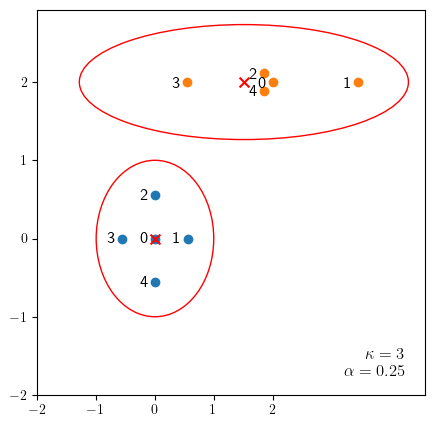

In [153]:
from scipy.linalg import cholesky

def non_lin_fn(v):
    x, y = v
    fn1 = lambda x, y: 1 + x + np.sin(2*x) + np.cos(y)
    fn2 = lambda x, y: 2 + 0.2*y
    
    return np.array([fn1(x,y), fn2(x,y)])


def calc_sigma_points(mu, sigma, kappa, alpha, beta):
    n = mu.shape[0]
    lmbd = alpha**2 * ( n + kappa ) - n
    
    # 1: calculate sigma points: define chi_{t-1}
    sigma_point_shift = cholesky((n + lmbd) * sigma)  #np.sqrt( (self.n + self.lmbd) * sigma )
    chi = np.zeros([n*2 + 1, 2])
    chi[0] = mu
    for i in range(1, n + 1):
        #                                            Take the column vector
        chi[i] = np.subtract(mu, -sigma_point_shift[:, i - 1]) #np.sqrt( (self.n + self.lmbd) * sigma )[:, i - 1]
    for i in range(n + 1, 2*n + 1):
        #                                            Take the column vector
        chi[i] = np.subtract(mu, sigma_point_shift[:, i - n - 1]) #np.sqrt( (self.n + self.lmbd) * sigma )[:, i - self.n - 1]
    return chi

mu = np.zeros(2)
sigma = np.eye(2)

n = 2

kappa = 3
alpha = 0.25
beta = 2

lmbd = alpha**2 * ( n + kappa ) - n


fig, ax = plt.subplots(figsize=(5,5))


sig_points = calc_sigma_points(mu, sigma, kappa, alpha, beta)

# fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))


ax.scatter(sig_points[:,0], sig_points[:,1])

for idx, s_point in enumerate(sig_points):
    ax.annotate(str(idx), s_point - np.array([0.25, 0.06]), fontsize=12)

ax.add_patch(confidence_ellipse(mu, sigma, ax, n_std=1.0, facecolor='None'))

sig_points_prime = sig_points.copy()

for idx, sig_p in enumerate(sig_points):
    sig_points_prime[idx] = non_lin_fn(sig_p)
    
sig_points = sig_points_prime

ax.scatter(mu[0], mu[1], c='red', marker='x', s=50)
ax.scatter(sig_points[:,0], sig_points[:,1])

for idx, s_point in enumerate(sig_points):
    ax.annotate(str(idx), s_point - np.array([0.25, 0.07]), fontsize=12)

n = 2

ws = np.ones((2*n + 1, 2))
ws[0,0] = lmbd / (n + lmbd)
ws[0,1] = ws[0,0] + ( 1 - alpha**2 + beta )



for i in range(1, 2*n + 1):
    ws[i,0] = 1/(2*(n + lmbd))
    ws[i,1] = ws[i,0]

mu_bar = ws[:,0] @ sig_points

R = np.array([[0.5,0],[0,0.5]])

y = sig_points - mu_bar.reshape(1,-1) #[np.newaxis, :]

sigma_bar = np.dot(y.T, np.dot(np.diag(ws[:,1]), y)) + R

ax.scatter(mu_bar[0], mu_bar[1], c='red', marker='x', s=50)
ax.add_patch(confidence_ellipse(mu_bar, sigma_bar, ax, n_std=1.0, facecolor='None'))


if sig_points[3][0] < 1:
    ax.set_xticks(np.linspace(-2,2,5))
    ax.set_yticks(np.linspace(-2,2,5))
else:
    ax.set_xticks([x for x in np.arange(-1, 1.25, 0.25)])
    ax.set_yticks([x for x in np.arange(-1, 1.25, 0.25)])


# custom_legend = patches.Rectangle((0.5, -1.), 0.5, 0.5, edgecolor='black',
# facecolor='None', linewidth=1.5)
# ax.add_patch(custom_legend)
# rx, ry = custom_legend.get_xy()
# cx = rx + custom_legend.get_width()/2.0
# cy = ry + custom_legend.get_height()/2.0

# demo_con_style(ax, fr'\kappa={kappa},\alpha={alpha}')

ax.text(.95, .05, fr'$\kappa ={kappa}$\newline  $\alpha ={alpha}$', fontsize = 12,
        transform=ax.transAxes, ha="right", va="bottom")
# ax.annotate( (fr'$\kappa = $ {kappa}\n$\alpha = $ {alpha}', (cx, cy), color='black', fontsize=8, ha='center', va='center')
#weight=None

fig.savefig(f'media/move_sigma_points.png')

# plt.plot()

# fig.savefig(f'media/conf_ellipse_kappa_{kappa}_alpha_{alpha}.png')


[]

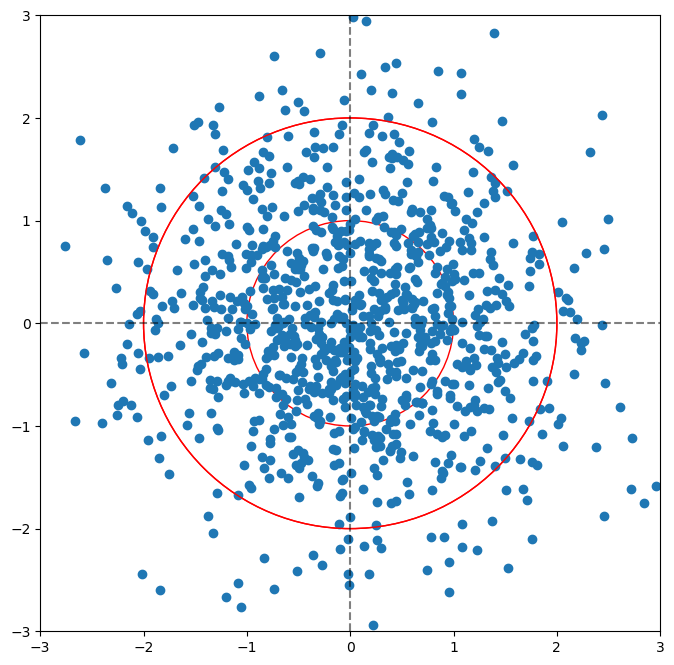

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(8,8))

axs.axvline(c='black', alpha=0.5, linestyle='--')
axs.axhline(c='black', alpha=0.5, linestyle='--')

m = np.zeros(2)
C = np.eye(2)

lambda_, v = np.linalg.eig(C)
lambda_ = np.sqrt(lambda_)

for j in range(1,3):
    elli = Ellipse(xy=(m[0], m[1]),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    elli.set_facecolor('none')
    elli.set_edgecolor('red')
    axs.add_artist(elli)

samples = np.random.multivariate_normal(mean=np.zeros(2), cov=np.eye(2), size=1000)
axs.scatter(samples[:,0], samples[:,1])

#elli = Ellipse([1,1], width=1, height=1, angle=0)
axs.set_xlim([-3,3])
axs.set_ylim([-3,3])
axs.add_patch(elli)
plt.plot()




In [14]:
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
from numpy.random import randn

def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    F = np.array([[1, dt, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, dt],
                  [0, 0, 0, 1]], dtype=float)
    return np.dot(F, x)
def hx(x):
    # measurement function - convert state into a measurement
    # where measurements are [x_pos, y_pos]
    return np.array([x[0], x[2]])

dt = 0.1
# create sigma points to use in the filter. This is standard for Gaussian processes
points = MerweScaledSigmaPoints(4, alpha=.1, beta=2., kappa=-1)
print(points)
kf = UnscentedKalmanFilter(dim_x=4, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
kf.x = np.array([-1., 1., -1., 1]) # initial state
kf.P *= 0.2 # initial uncertainty
z_std = 0.1
kf.R = np.diag([z_std**2, z_std**2]) # 1 standard
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01**2, block_size=2)
zs = [[i+randn()*z_std, i+randn()*z_std] for i in range(50)] # measurements


for z in zs:
    kf.predict()
    kf.update(z)
    print(kf.x, 'log-likelihood', kf.log_likelihood)

MerweScaledSigmaPoints object
n = 4
alpha = 0.1
beta = 2.0
kappa = -1
Wm = [-132.33333333   16.66666667   16.66666667   16.66666667   16.66666667
        16.66666667   16.66666667   16.66666667   16.66666667]
Wc = [-129.34333333   16.66666667   16.66666667   16.66666667   16.66666667
        16.66666667   16.66666667   16.66666667   16.66666667]
subtract = <ufunc 'subtract'>
sqrt = <function cholesky at 0x0000021ADC0C9160>
[-0.15234087  1.07402584 -0.11111523  1.0781076 ] log-likelihood -3.355557576615312
[0.49672078 2.0350398  0.57764681 2.10883399] log-likelihood -48.02455299522441
[1.35089651 3.99640769 1.43359798 4.05330939] log-likelihood -94.90348517713953
[2.32855996 5.80639007 2.4070187  5.83218854] log-likelihood -74.64423448038012
[3.47508079 7.40648319 3.46256204 7.16773798] log-likelihood -65.17857898781136
[4.59931897 8.35615875 4.49280188 7.94380397] log-likelihood -32.84835850929442
[5.70346082 8.9384983  5.59159428 8.60396784] log-likelihood -26.0768651267434
[6.7339615

In [15]:
zs

[[-0.11532803946129483, -0.07206152472335907],
 [0.959751400215298, 1.0742659002497437],
 [2.066943995324407, 2.1434784336001362],
 [2.969343726365741, 3.0367910635368363],
 [4.126815429200108, 4.00654527101993],
 [5.083456879115794, 4.888434859520696],
 [6.0847657668823185, 6.023857126495692],
 [6.95364123753058, 6.885424559082887],
 [7.99812491589002, 8.053871605907592],
 [9.025486798959397, 8.99084228439664],
 [10.106847892090034, 10.108521347155788],
 [10.916059159386133, 10.981903027278413],
 [11.960756931862091, 12.014509379080968],
 [12.994129154319506, 13.068647007529005],
 [13.895823209541309, 14.029634077367572],
 [15.295079568634463, 14.807493186085106],
 [15.985664291486266, 15.881362642847344],
 [17.018666557492484, 17.095946344591873],
 [18.031744821545313, 18.145334316814733],
 [19.056706380999852, 19.13095489222362],
 [20.013329972289192, 19.903370993214647],
 [21.035976515256372, 21.016027821352125],
 [22.020717356778544, 22.084963708034078],
 [22.927902936005513, 23.0

In [15]:
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise
from numpy.random import randn

def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    F = np.array([[dt, 0],
                  [0, 1]], dtype=float)
    return np.array([x[0] + 1, x[1] + 1]) # np.dot(F, x)
def hx(x):
    # measurement function - convert state into a measurement
    # where measurements are [x_pos, y_pos]
    return np.array([x[0], x[1]])

dt = 0.1
# create sigma points to use in the filter. This is standard for Gaussian processes
points = MerweScaledSigmaPoints(2, alpha=.3, beta=2., kappa=3)
print(points)
kf = UnscentedKalmanFilter(dim_x=2, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
kf.x = np.array([-1., 1.]) # initial state
kf.P *= 0.2 # initial uncertainty
z_std = 0.1
kf.R = np.diag([z_std**2, z_std**2]) # 1 standard
kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01**2)#, block_size=2)
zs = [[i+randn()*z_std, i+randn()*z_std] for i in range(50)] # measurements


for z in zs:
    kf.predict()
    kf.update(z)
    print(kf.x, 'log-likelihood', kf.log_likelihood)

MerweScaledSigmaPoints object
n = 2
alpha = 0.3
beta = 2.0
kappa = 3
Wm = [-3.44444444  1.11111111  1.11111111  1.11111111  1.11111111]
Wc = [-0.53444444  1.11111111  1.11111111  1.11111111  1.11111111]
subtract = <ufunc 'subtract'>
sqrt = <function cholesky at 0x0000021DA7BFEAF0>
[-0.05932292  0.08189496] log-likelihood -9.944127131698034
[0.96013646 0.97520311] log-likelihood 0.8325435631998688
[1.93504297 1.99746226] log-likelihood 2.018257442542935
[2.95438775 2.97804095] log-likelihood 2.0197466745032595
[3.95295933 3.9915619 ] log-likelihood 2.3577619131852057
[4.98244182 5.00674366] log-likelihood 0.9074652759595443
[5.98206865 6.00711113] log-likelihood 2.613630148578504
[6.97175024 7.01141524] log-likelihood 2.279987958268451
[7.97965823 8.00793619] log-likelihood 2.3783394683291856
[8.97688696 9.0076695 ] log-likelihood 2.627081269460726
[ 9.98432253 10.01078396] log-likelihood 2.3119052538262435
[10.9975572  11.00814483] log-likelihood 1.4681986883564102
[11.99882289 12.0140

[-7.10542736e-15]
[[1.]]


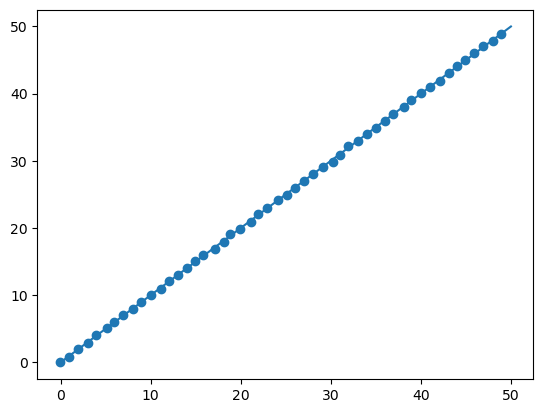

In [16]:
from sklearn.linear_model import LinearRegression

np_zs = np.array(zs, dtype=float)
reg = LinearRegression().fit(np_zs.reshape(-1,1), np_zs.reshape(-1,1))
print(reg.intercept_)
print(reg.coef_)
plt.scatter(np_zs[:,0], np_zs[:,1])
plt.plot([0,50], [0,50])

In [17]:
arr = np.ones(2)
arr = arr[np.newaxis, :]
arr


array([[1., 1.]])

In [18]:
w_asd = np.array([1,1])
np.diag(w_asd)

array([[1, 0],
       [0, 1]])

In [19]:
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise

In [24]:
from scipy.linalg import cholesky

In [25]:
class UKF2D():
    """
        Class for Unscented Kalman Filter in 2 dimensions
    """
    def __init__(
        self,
        u, 
        g, 
        h,
        mu: object = np.zeros(2),
        sigma: object = np.eye(2),
        alpha: float = 0.3,
        beta: float = 2.0,
        kappa: int = 3.0,
        plot_bool: bool = False):
        
        # mu: mean of gaussian
        # sigma: covariance matrix of gaussian
        # u: control
        # z: measurement

        self.n = mu.shape[0]

        self.kappa = kappa # choose kappa >= 0
        self.alpha = alpha # choose alpha \in (0,1]
        self.beta = beta # choose Beta as 2 for normal distributions

        self.lmbd = self.alpha**2 * ( self.n + self.kappa ) - self.n
        
        self.mu = mu
        self.sigma = sigma
        
        self.plot_bool = plot_bool
        
        self.u = u
        self.z = z
        self.g = g
        self.h = h
        
        
    
    def calc_sigma_points(self, mu, sigma):
        # 1: calculate sigma points: define chi_{t-1}
        sigma_point_shift = cholesky((self.n + self.lmbd) * sigma)  #np.sqrt( (self.n + self.lmbd) * sigma )
        chi = np.zeros([self.n*2 + 1, 2])
        chi[0] = mu
        for i in range(1, self.n + 1):
            #                                            Take the column vector
            chi[i] = np.subtract(mu, -sigma_point_shift[:, i - 1]) #np.sqrt( (self.n + self.lmbd) * sigma )[:, i - 1]
        for i in range(self.n + 1, 2*self.n + 1):
            #                                            Take the column vector
            chi[i] = np.subtract(mu, sigma_point_shift[:, i - self.n - 1]) #np.sqrt( (self.n + self.lmbd) * sigma )[:, i - self.n - 1]
        return chi
        
        
    def UKF(self, z):
        chi_prev = self.calc_sigma_points(self.mu, self.sigma)
        
        # TODO REMOVE
        self.chi_prev = chi_prev

        if self.plot_bool:        
            plot_cov(np.zeros(2), np.eye(2), chi_prev)





        # calculate weights
        # matrix:
        #    -> column = weight for sigma point
        #    -> row = pos 0: weight for mean; pos 1: weight for covariance

        self.ws = np.ones((2*self.n + 1, 2))
        self.ws[0,0] = self.lmbd / (self.n + self.lmbd)
        self.ws[0,1] = self.ws[0,0] + ( 1 - self.alpha**2 + self.beta )



        for i in range(1, 2*self.n + 1):
            self.ws[i,0] = 1/(2*(self.n + self.lmbd))
            self.ws[i,1] = self.ws[i,0]

        # 2: apply non linear map from motion model
        chi_bar_star = self.g(chi_prev) #g(u, chi_prev)

        self.chi_bar_star = chi_bar_star
        
        # STEP 3 calculate mu_bar | x_prior in other implementation
        mu_bar = self.ws[:,0] @ chi_bar_star #g(chi_prev)

        self.mu_bar = mu_bar
        
        #for i in range(2*n):
        #    w[c]
    #     mu_bar = 0
    #     for i, w in enumerate(ws[:,0]):
    #         mu_bar += w * chi_bar_star[i]

        #mu_bar = ws[:,0] * chi_bar_star[:] #np.sum( ws[:,0] @ chi_bar_star[:], axis=0 ) #np.dot(ws[:,0], chi_bar_star[:]) )

        # STEP 4 calculate sigma_bar
        # TODO: MOVE to __init__
        R = np.array([[0.5,0],[0,0.5]])

        y = chi_bar_star - mu_bar[np.newaxis, :]
        
        #print(f'y: {y}')
        sigma_bar = np.dot(y.T, np.dot(np.diag(self.ws[:,1]), y)) + R

        self.sigma_bar = sigma_bar
        
        # This is not working. Apparently. Code above works as expected
    #     sigma_bar = np.zeros([2,2])
    #     for i in range(2*n+1):
    #         sigma_bar += ws[i,1] * (chi_bar_star[i] - mu_bar) @ (chi_bar_star[i] - mu_bar).T + R

        #sigma = ws[:,1] @ ( chi_bar_star - mu_bar ) @ ( chi_bar_star - mu_bar ).T + R

        # UPDATE 
        # STEP 5: calculate chi_bar

        chi_bar = self.calc_sigma_points(mu_bar, sigma_bar)
        # TODO REMOVE
        self.chi_bar = chi_bar

        # STEP 6: Apply non linear map from observations
        #h = lambda x: x + 0.1
        Z_bar = self.h(chi_bar)
        
        self.Z_bar = Z_bar

        # STEP 7: calculate z_hat
        z_hat = self.ws[:,0] @ Z_bar

        # TODO REMOVE
        self.z_hat = z_hat



        # STEP 8: Calculate Std_dev 
        Q = np.array([[0.5,0],[0,0.5]])
        y = Z_bar - z_hat[np.newaxis, :]
        S_pred = np.dot(y.T, np.dot(np.diag(self.ws[:,1]), y)) + Q    #np.dot(y.T, np.dot(np.diag(Wc), y))
        
        self.y = y.copy()
        self.S_pred = S_pred

    #     Q = np.array([[0.5,0],[0,0.5]])
    #     Std_dev = np.zeros([2,2])
    #     for i in range(2*n):
    #         Std_dev += ws[i,1] * (Z_bar[i] - z_hat) @ (Z_bar[i] - z_hat).T + Q

        # STEP 9: Cross Variance

        Sigma_bar_cross = np.zeros((chi_bar.shape[1], Z_bar.shape[1]))
        N = chi_bar.shape[0]
        #pdb.set_trace()
        for i in range(N):
            dx = np.subtract(chi_bar[i], mu_bar)
            dz = np.subtract(Z_bar[i], z_hat)
            Sigma_bar_cross += self.ws[:,1][i] * np.outer(dx, dz)

        self.Sigma_bar_cross = Sigma_bar_cross
    #     Sigma_pred = np.zeros([2,2])
    #     for i in range(2*n):
    #         Sigma_pred += ws[i,1] * (chi_bar[i] - mu_bar) @ (Z_bar[i] - z_hat).T

        # STEP 10: Calculate Kalman Gain
        self.KG = np.dot(Sigma_bar_cross, np.linalg.inv(S_pred)) #np.linalg.inv(Std_dev)

        # STEP 11: Calculate mu
        self.mu = mu_bar + np.dot(self.KG, (z - z_hat))

        # STEP 12: Calculate Covariance with observation
        self.sigma = sigma_bar - np.dot(self.KG, np.dot(S_pred, self.KG.T))

        return self.mu, self.sigma
    

In [26]:
z_std = 0.1
zs = [[i+randn()*z_std, i+randn()*z_std] for i in range(50)] # measurements

In [32]:
def gx(x):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    return x + 1 #np.array([x[0] + 1, x[1] + 1])
def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    return x + 1 #np.array([x[0] + 1, x[1] + 1])
def hx(x):
    # measurement function - convert state into a measurement
    # where measurements are [x_pos, y_pos]
    return x #np.array([x[0], x[1]])


dt = 0.1

test = UKF2D(u = None, g = gx, h = hx)

print(test.UKF(z = zs[0]))
print(test.UKF(z = zs[1]))
print(test.UKF(z = zs[2]))



# for z in zs[:2]:
#     m, S, mu_prev_tmp, sigma_prev_tmp, chi_prev_tmp, S_pred_tmp = UKF_2d(mu_prev = m, sigma_prev = S, u=None, z=z, g=gx, h=hx, plot_bool=True)

(array([0.2200005 , 0.05062097]), array([[3.75000000e-01, 8.81305543e-31],
       [8.81305543e-31, 3.75000000e-01]]))
(array([1.01614561, 1.10681659]), array([[3.18181818e-01, 1.77045487e-30],
       [1.81038688e-30, 3.18181818e-01]]))
(array([2.00169547, 2.04913728]), array([[3.10344828e-01, 4.42737631e-30],
       [4.23016108e-30, 3.10344828e-01]]))


In [29]:
import pdb

def execute():

    dt = 0.1
    # create sigma points to use in the filter. This is standard for Gaussian processes

    points = MerweScaledSigmaPoints(2, alpha=.3, beta=2., kappa=3)
    kf = UnscentedKalmanFilter(dim_x=2, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
    kf.x = np.array([0., 0.]) # initial state
    #kf.P *= 0.2 # initial uncertainty
    kf.R = np.array([[0.5,0],[0,0.5]]) #np.diag([z_std**2, z_std**2]) # 1 standard
    kf.Q = np.array([[0.5,0],[0,0.5]]) #Q_discrete_white_noise(dim=2, dt=dt, var=0.01**2)#, block_size=2)

    pdb.set_trace()
    kf.predict(tst = test)
    kf.update(zs[0], tst = test)

    print(kf.x)
    print(kf.P)
    
execute()

> c:\users\lisat\appdata\local\temp\ipykernel_61300\2395933412.py(16)execute()

ipdb> c
[1.01614561 1.10681659]
[[3.18181818e-01 1.77045487e-30]
 [1.81038688e-30 3.18181818e-01]]


In [ ]:
mean: [0.11036365 0.35435415]
Cov: [[ 3.75000000e-01 -1.71026492e-15]
 [-1.71026492e-15  3.75000000e-01]]

In [39]:
def plot_cov(m, C, sigma_points=None):
    fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(6,6))

    axs.axvline(c='black', alpha=0.5, linestyle='--')
    axs.axhline(c='black', alpha=0.5, linestyle='--')

    m = np.zeros(2)
    C = np.eye(2)

    lambda_, v = np.linalg.eig(C)
    lambda_ = np.sqrt(lambda_)

    for j in range(1,3):
        elli = Ellipse(xy=(m[0], m[1]),
                      width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])))
        elli.set_facecolor('none')
        elli.set_edgecolor('red')
        axs.add_artist(elli)

    samples = np.random.multivariate_normal(mean=m, cov=C, size=1000)
    axs.scatter(samples[:,0], samples[:,1], alpha=0.5)

    if sigma_points is not None:
        axs.scatter(sigma_points[:,0], sigma_points[:,1], c='green', s=50, marker='x')
    
    #elli = Ellipse([1,1], width=1, height=1, angle=0)
    axs.set_xlim([m[0] - C[0,0] * 5,m[0] + C[0,0] * 5])
    axs.set_ylim([m[0] - C[1,1] * 5,m[0] + C[1,1] * 5])
    axs.add_patch(elli)
    plt.plot()


def calc_sigma_points(sigma, mu, n, lmbd):
    # 1: calculate sigma points: define chi_{t-1}
    sigma_point_shift = np.sqrt( (n + lmbd) * sigma )
    chi = np.zeros([n*2 + 1, 2])
    chi[0] = mu
    for i in range(1, n + 1):
        #                                 Take the column vector
        chi[i] = mu + np.sqrt( (n + lmbd) * sigma )[:, i - 1]
    for i in range(n + 1, 2*n + 1):
        #                                 Take the column vector
        chi[i] = mu - np.sqrt( (n + lmbd) * sigma )[:, i - n - 1]
    return chi

def UKF_2d(mu_prev, sigma_prev, u, z, g, h, alpha=.3, beta=2., kappa=3, plot_bool=False):
    # mu: mean of gaussian
    # sigma: covariance matrix of gaussian
    # u: 
    # z: measurement
    # Parameter tuning:
    
    n = mu_prev.shape[0]
    
#     kappa = 3 # choose kappa >= 0
#     alpha = 0.9 # choose alpha \in (0,1]
#     beta = 2 # choose Beta as 2 for normal distributions
    
    lmbd = alpha**2 * ( n + kappa ) - n
    
    # g is the non linear function -> for robot it is the velocity motion model
    #g = lambda x, y : np.array([x + 1, y + 1]) # just a dummy function for now; make it passable
    #g = lambda chi : chi + 1 # just a dummy function for now; make it passable
    
    # 1: calculate sigma points: define chi_{t-1}
#     sigma_point_shift = np.sqrt( (n + lmbd) * sigma_prev )
#     chi_prev = np.zeros([n*2 + 1, 2])
#     chi_prev[0] = mu_prev
#     for i in range(1, n + 1):
#         #                                 Take the column vector
#         chi_prev[i] = mu_prev + np.sqrt( (n + lmbd) * sigma_prev )[:, i - 1]
#     for i in range(n + 1, 2*n + 1):
#         #                                 Take the column vector
#         chi_prev[i] = mu_prev - np.sqrt( (n + lmbd) * sigma_prev )[:, i - n - 1]
    #chi_prev = np.array([ mu_prev, mu_prev + np.sqrt( (n + lmbd) * sigma_prev ), mu_prev - np.sqrt( (n + lmbd) * sigma_prev ) ])
    
    chi_prev = calc_sigma_points(sigma_prev, mu_prev, n, lmbd)
    
    if plot_bool:        
        plot_cov(np.zeros(2), np.eye(2), chi_prev)



        
    
    # calculate weights
    # matrix:
    #    -> column = weight for sigma point
    #    -> row = pos 0: weight for mean; pos 1: weight for covariance
    
    ws = np.ones((2*n + 1, 2))
    ws[0,0] = lmbd / (n + lmbd)
    ws[0,1] = ws[0,0] + ( 1 - alpha**2 + beta )
    
    
    
    for i in range(1, 2*n + 1):
        ws[i,0] = 1/(2*(n + lmbd))
        ws[i,1] = ws[i,0]
    
    # 2: apply non linear map from motion model
    chi_bar_star = g(chi_prev) #g(u, chi_prev)
    
    # STEP 3 calculate mu_bar | x_prior in other implementation
    mu_bar = ws[:,0] @ chi_bar_star #g(chi_prev)
    
    
    #print(f'mu_bar: {mu_bar}')
    
    #for i in range(2*n):
    #    w[c]
#     mu_bar = 0
#     for i, w in enumerate(ws[:,0]):
#         mu_bar += w * chi_bar_star[i]
    
    #mu_bar = ws[:,0] * chi_bar_star[:] #np.sum( ws[:,0] @ chi_bar_star[:], axis=0 ) #np.dot(ws[:,0], chi_bar_star[:]) )
    
    # STEP 4 calculate sigma_bar
    R = np.array([[0.5,0],[0,0.5]])
    
    y = chi_bar_star - mu_bar[np.newaxis, :]
    #print(f'y: {y}')
    sigma_bar = np.dot(y.T, np.dot(np.diag(ws[:,1]), y)) + R
    
    # This is not working. Apparently. Code above works as expected
#     sigma_bar = np.zeros([2,2])
#     for i in range(2*n+1):
#         sigma_bar += ws[i,1] * (chi_bar_star[i] - mu_bar) @ (chi_bar_star[i] - mu_bar).T + R
    
    #sigma = ws[:,1] @ ( chi_bar_star - mu_bar ) @ ( chi_bar_star - mu_bar ).T + R
    
    #print(f'sigma_bar: {sigma_bar}')
    
    # UPDATE 
    # STEP 5: calculate chi_bar
    
    chi_bar = calc_sigma_points(sigma_bar, mu_bar, n, lmbd)
    # TODO REMOVE
    chi_prev_tmp = chi_bar
    
#     chi_bar = np.ones([1 + n*2, 2])
#     chi_bar[0] = mu_bar
#     for i in range(1, n + 1):
#         #                                 Take the column vector
#         chi_bar[i] = mu_bar + np.sqrt( (n + lmbd) * sigma_bar )[:, i - 1]
#     for i in range(n + 1, 2*n + 1):
#         #                                 Take the column vector
#         chi_bar[i] = mu_bar - np.sqrt( (n + lmbd) * sigma_bar )[:, i - n - 1]
    
    #print(f'chi_bar: {chi_bar}')
    #chi_bar_prime = calc_sigma_points(sigma_bar, mu_bar, n, lmbd)
    #print(f'chi_bar_prime: {chi_bar_prime}')
    
# kf.points_fn: MerweScaledSigmaPoints object
# n = 2
# alpha = 0.3
# beta = 2.0
# kappa = 3
# Wm = [-3.44444444  1.11111111  1.11111111  1.11111111  1.11111111]
# Wc = [-0.53444444  1.11111111  1.11111111  1.11111111  1.11111111]
    
#     points = MerweScaledSigmaPoints(2, alpha=.3, beta=2., kappa=3)
#     print(f'points conf: {points}')
#     print(f'sigma points: {points.sigma_points(mu_bar, sigma_bar)}')
    
#     print(f'UKF.x: {mu_bar}')
#     print(f'UKF.P: {sigma_bar}')
#     print(f'UKF.sigmas_f: {points.sigma_points(mu_bar, sigma_bar)}')
    
    # STEP 6: Apply non linear map from observations
    #h = lambda x: x + 0.1
    Z_bar = h(chi_bar)
    
    # STEP 7: calculate z_hat
    z_hat = ws[:,0] @ Z_bar
    
    # TODO REMOVE
    mu_prev_tmp = z_hat
    
    
    
    # STEP 8: Calculate Std_dev 
    Q = np.array([[0.5,0],[0,0.5]])
    y = Z_bar - z_hat[np.newaxis, :]
    S_pred = np.dot(y.T, np.dot(np.diag(ws[:,1]), y)) + Q
    
    S_pred_tmp = S_pred.copy()
    
    print(f'S_pred: {S_pred}')
#     Q = np.array([[0.5,0],[0,0.5]])
#     Std_dev = np.zeros([2,2])
#     pdb.set_trace()
#     for i in range(2*n):
#         Std_dev += ws[i,1] * (Z_bar[i] - z_hat) @ (Z_bar[i] - z_hat).T + Q
        
#     print(f'Std_dev: {Std_dev}')
    
    # STEP 9: Cross Variance
    
    Sigma_bar_cross = np.zeros((chi_bar.shape[1], Z_bar.shape[1]))
    N = chi_bar.shape[0]
    #pdb.set_trace()
    for i in range(N):
        dx = np.subtract(chi_bar[i], mu_bar)
        dz = np.subtract(Z_bar[i], z_hat)
        Sigma_bar_cross += ws[:,1][i] * np.outer(dx, dz)

    sigma_prev_tmp = Sigma_bar_cross
#     Sigma_pred = np.zeros([2,2])
#     for i in range(2*n):
#         Sigma_pred += ws[i,1] * (chi_bar[i] - mu_bar) @ (Z_bar[i] - z_hat).T
        
    print(f'Sigma_bar_cross: {Sigma_bar_cross}')
    
    # STEP 10: Calculate Kalman Gain
    KG = np.dot(Sigma_bar_cross, np.linalg.inv(S_pred)) #np.linalg.inv(Std_dev)
    print(f'KG: {KG}')
    
    # STEP 11: Calculate mu
    mu = mu_bar + np.dot(KG, (z - z_hat))
    
    # STEP 12: Calculate Covariance with observation
    Sigma = sigma_bar - np.dot(KG, np.dot(S_pred, KG.T))
    
    return mu, Sigma, mu_prev_tmp, sigma_prev_tmp, chi_prev_tmp, S_pred_tmp
    

In [21]:
def compute_process_sigmas(x, P, fx, points):
    """
    computes the values of sigmas_f. Normally a user would not call
    this, but it is useful if you need to call update more than once
    between calls to predict (to update for multiple simultaneous
    measurements), so the sigmas correctly reflect the updated state
    x, P.
    """

    if fx is None:
        fx = fx

    # calculate sigma points for given mean and covariance
    sigmas = points.sigma_points(x, P)
    
    sigmas_f = np.zeros((5, 2))
    for i, s in enumerate(sigmas):
        sigmas_f[i] = fx(s)
    
    return sigmas_f

In [22]:
import pdb

S_pred: [[2.00000000e+00 1.82428258e-15]
 [1.82428258e-15 2.00000000e+00]]
Sigma_bar_cross: [[1.50000000e+00 1.82428258e-15]
 [1.82428258e-15 1.50000000e+00]]
KG: [[7.50000000e-01 2.28035323e-16]
 [2.28035323e-16 7.50000000e-01]]
mean: [0.11036365 0.35435415]
Cov: [[ 3.75000000e-01 -1.71026492e-15]
 [-1.71026492e-15  3.75000000e-01]]
> c:\users\lisat\appdata\local\temp\ipykernel_1672\168174003.py(46)<module>()

ipdb> c


C:\Users\lisat\AppData\Local\Temp\ipykernel_1672\1042788061.py:36: RuntimeWarning: invalid value encountered in sqrt
  sigma_point_shift = np.sqrt( (n + lmbd) * sigma )
C:\Users\lisat\AppData\Local\Temp\ipykernel_1672\1042788061.py:41: RuntimeWarning: invalid value encountered in sqrt
  chi[i] = mu + np.sqrt( (n + lmbd) * sigma )[:, i - 1]
C:\Users\lisat\AppData\Local\Temp\ipykernel_1672\1042788061.py:44: RuntimeWarning: invalid value encountered in sqrt
  chi[i] = mu - np.sqrt( (n + lmbd) * sigma )[:, i - n - 1]


kf.S: [[2.00000000e+00 4.93038066e-31]
 [4.93038066e-31 2.00000000e+00]]
kf.K: [[ 7.50000000e-01 -2.09541178e-31]
 [-2.34193081e-31  7.50000000e-01]]
S_pred: [[nan nan]
 [nan nan]]
Sigma_bar_cross: [[nan nan]
 [nan nan]]
KG: [[nan nan]
 [nan nan]]
mean: [nan nan]
Cov: [[nan nan]
 [nan nan]]
> c:\users\lisat\appdata\local\temp\ipykernel_1672\168174003.py(44)<module>()

ipdb> c
kf.S: [[1.37500000e+00 9.86076132e-31]
 [1.18329136e-30 1.37500000e+00]]
kf.K: [[ 6.36363636e-01 -4.56365813e-31]
 [-5.47638976e-31  6.36363636e-01]]


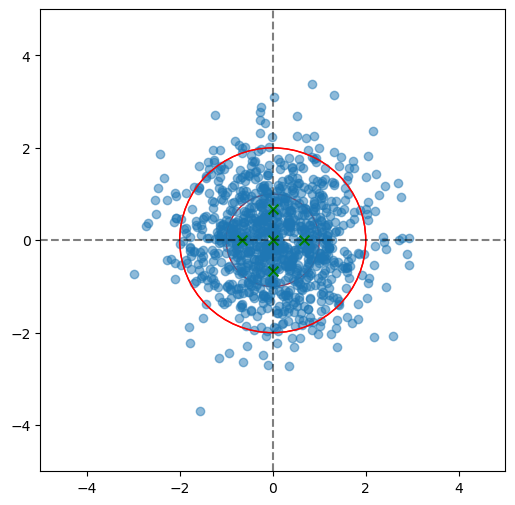

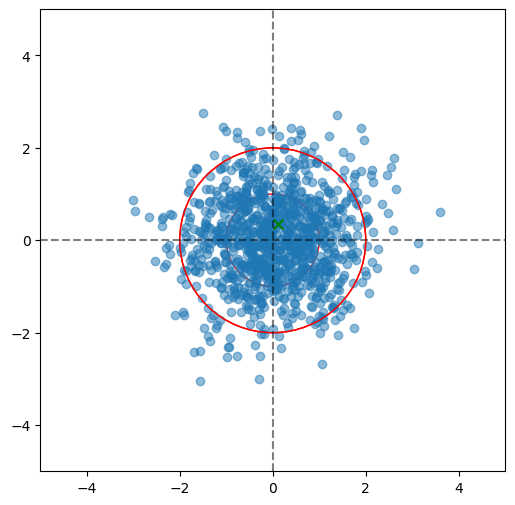

In [54]:
def gx(x):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    return x + 1 #np.array([x[0] + 1, x[1] + 1])
def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    return x + 1 #np.array([x[0] + 1, x[1] + 1])
def hx(x):
    # measurement function - convert state into a measurement
    # where measurements are [x_pos, y_pos]
    return x #np.array([x[0], x[1]])

dt = 0.1
# create sigma points to use in the filter. This is standard for Gaussian processes

points = MerweScaledSigmaPoints(2, alpha=.3, beta=2., kappa=3)
kf = UnscentedKalmanFilter(dim_x=2, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
kf.x = np.array([0., 0.]) # initial state
#kf.P *= 0.2 # initial uncertainty
z_std = 0.1
kf.R = np.array([[0.5,0],[0,0.5]]) #np.diag([z_std**2, z_std**2]) # 1 standard
kf.Q = np.array([[0.5,0],[0,0.5]]) #Q_discrete_white_noise(dim=2, dt=dt, var=0.01**2)#, block_size=2)
zs = [[i+randn()*z_std, i+randn()*z_std] for i in range(50)] # measurements


#for z in zs:
    #kf.predict()
    #kf.update(z)
    #print(kf.x, 'log-likelihood', kf.log_likelihood)
m = np.zeros(2)
S = np.eye(2)

verbose = False

for z in zs[:2]:
    m, S, mu_prev_tmp, sigma_prev_tmp, chi_prev_tmp, S_pred_tmp = UKF_2d(mu_prev = m, sigma_prev = S, u=None, z=z, g=gx, h=hx, plot_bool=True)
    
    if verbose:
        pass
    print(f'mean: {m}')
    print(f'Cov: {S}')
    
    pdb.set_trace()
    #np.array([1,2,3,4]).copy()
    kf.predict(dt=None, UT=None, fx=None, tst=5, chi_prev_tmp=chi_prev_tmp, mu_prev_tmp=mu_prev_tmp, sigma_prev_tmp=sigma_prev_tmp,S_pred_tmp=S_pred_tmp)
    
#     print(f'kf.x: {kf.x}')
#     print(f'kf.P: {kf.P}')
#     print(f'kf.sigmas_f: {kf.sigmas_f}')
#     print(f'kf.points_fn: {kf.points_fn}')
    
    if verbose:
        print(f'kf.x_prior: {kf.x_prior}')
        print(f'kf.P_prior: {kf.P_prior}')
    
    kf.update(z)
    
    print(f'kf.S: {kf.S}')
    print(f'kf.K: {kf.K}')
#     print(f'kf.sigmas_f: {kf.sigmas_f}')
#     print(f'kf.sigmas_h: {kf.sigmas_h}')
    
    if verbose:
        print(f'kf mean: {kf.x}')
        print(f'kf P: {kf.P}')

In [ ]:
Std_dev += ws[i,1] * (Z_bar[i] - z_hat) @ (Z_bar[i] - z_hat).T + Q

In [ ]:
from filterpy.kalman import unscented_transform

def gx(x):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    return x + 1 #np.array([x[0] + 1, x[1] + 1])
def fx(x, dt):
    # state transition function - predict next state based
    # on constant velocity model x = vt + x_0
    return x + 1 #np.array([x[0] + 1, x[1] + 1])
def hx(x):
    # measurement function - convert state into a measurement
    # where measurements are [x_pos, y_pos]
    return x #np.array([x[0], x[1]])

x = np.array([0., 0.]) # initial state
P = np.eye(2) # initial uncertainty

Q = np.array([[0.5,0],[0,0.5]])

UT = unscented_transform
residual_x = np.subtract
x_mean = None

points = MerweScaledSigmaPoints(2, alpha=.3, beta=2., kappa=3)
#kf = UnscentedKalmanFilter(dim_x=2, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)

sigmas_f = np.zeros((5, 2))


print(f'x: {x}, P: {P}')

# calculate sigma points for given mean and covariance
sigmas_f = compute_process_sigmas(x, P, gx, points)

print(sigmas_f)

#and pass sigmas through the unscented transform to compute prior
x, P = UT(sigmas_f, points.Wm, points.Wc, Q,
                    x_mean, residual_x)

# update sigma points to reflect the new variance of the points
sigmas_f = points.sigma_points(x, P)

print(sigmas_f)

# save prior
x_prior = np.copy(x)
P_prior = np.copy(P)
